## IQR method

if data is skewed then this method is used

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/pluto7/Desktop/git_data/ML_algorithem/Linear_regression/placement.csv")
df.shape

(200, 2)

In [11]:
df.sample(5)

,cgpa,package
14,7.73,3.42
125,7.33,3.16
110,8.18,3.76
167,8.13,3.60
13,6.93,2.89


In [12]:
#df=df.append('cgpa':12,'package':2)
df = df.append({'cgpa': 120,'package':-1}, ignore_index=True)

/var/folders/sl/mghz4g4x4nq06lrj3hn18prw0000gn/T/ipykernel_90750/1601557911.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'cgpa': 120,'package':-1}, ignore_index=True)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


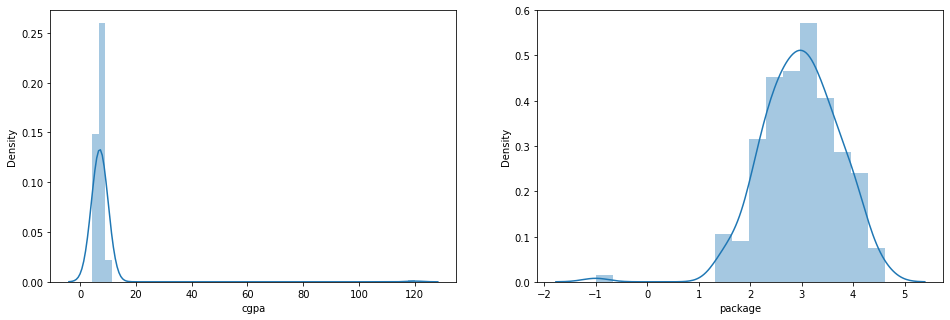

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

plt.show()

In [14]:
df['package'].describe()

count    201.000000
mean       2.976169
std        0.745268
min       -1.000000
25%        2.480000
50%        2.990000
75%        3.490000
max        4.620000
Name: package, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='package'>

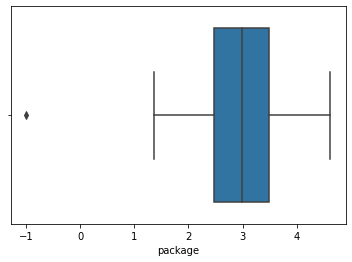

In [15]:
sns.boxplot(df['package'])


In [16]:
# Finding the IQR
percentile25 = df['package'].quantile(0.25)
percentile75 = df['package'].quantile(0.75)
percentile75

3.49

In [17]:
iqr = percentile75 - percentile25


In [18]:
iqr


1.0100000000000002

In [19]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 5.005000000000001
Lower limit 0.9649999999999996


In [21]:
df[df['package'] > upper_limit]

,cgpa,package


In [22]:
df[df['package'] < lower_limit]


,cgpa,package
200,120.0,-1.0


In [23]:
new_df = df[df['package'] > lower_limit]
new_df.shape

(200, 2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a f

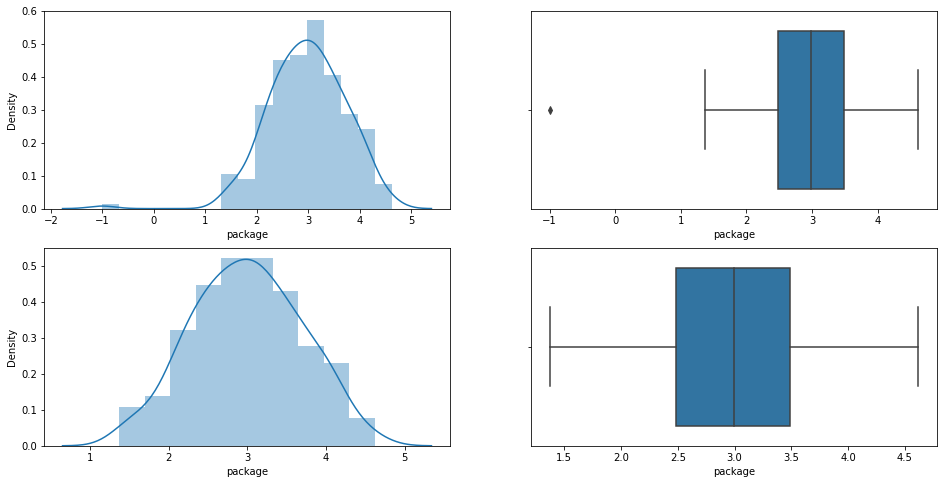

In [24]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['package'])

plt.subplot(2,2,2)
sns.boxplot(df['package'])

plt.subplot(2,2,3)
sns.distplot(new_df['package'])

plt.subplot(2,2,4)
sns.boxplot(new_df['package'])

plt.show()

In [26]:
new_df_cap = df.copy()

new_df_cap['package'] = np.where(
    new_df_cap['package'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['package'] < lower_limit,
        lower_limit,
        new_df_cap['package']
    )
)

new_df_cap.shape

(201, 2)

In [ ]:
#np.where(condtion,true,false)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a f

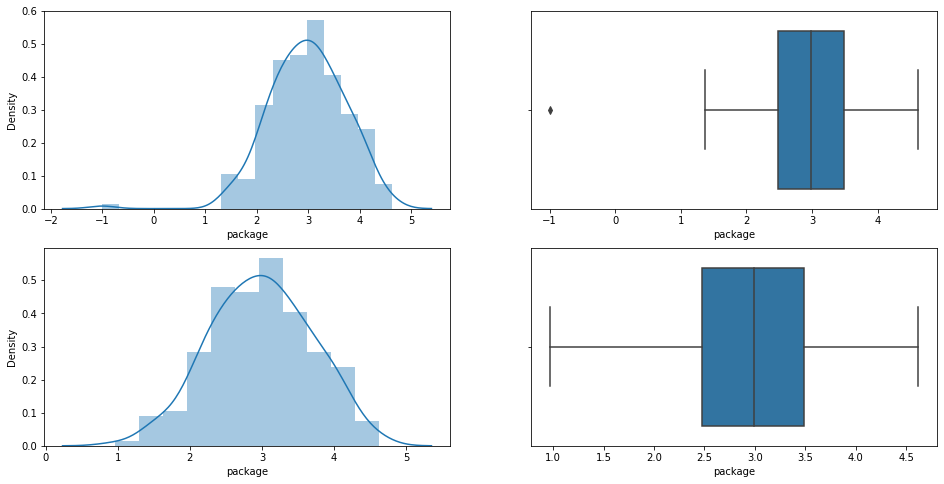

In [27]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['package'])

plt.subplot(2,2,2)
sns.boxplot(df['package'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['package'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['package'])

plt.show()